In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

In [3]:
Root = "/content/drive/MyDrive/Colab_Notebooks"
os.chdir(Root)

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = fetch_california_housing()

In [6]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
x = pd.DataFrame(data.data,columns=data.feature_names)

In [9]:
 y = pd.DataFrame(data.target,columns=["target"])

In [10]:
print(x.shape)
print(y.shape)

(20640, 8)
(20640, 1)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [27]:
model = Sequential()
model.add(Dense(8,activation="relu",input_dim=8)),
model.add(Dense(28,activation="relu")),
model.add(Dense(10,activation="relu")),
model.add(Dense(5,activation="relu")),
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 28)                252       
                                                                 
 dense_7 (Dense)             (None, 10)                290       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [28]:
def coff_determination(true,predict):
  from keras import backend as k
  ss_res = k.sum(k.square(true-predict))
  ss_tot = k.sum(k.square(true - k.mean(true)))
  return (1 - ss_res/(ss_tot + k.epsilon()))

In [29]:
LOSS = "mse"
OPTIMIZER = "sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=[coff_determination])

In [31]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
413/413 [==============================] - 2s 5ms/step - loss: 0.3772 - coff_determination: 0.6955 - val_loss: 0.3989 - val_coff_determination: 0.6992
Epoch 2/10
413/413 [==============================] - 1s 3ms/step - loss: 0.3713 - coff_determination: 0.7007 - val_loss: 0.3991 - val_coff_determination: 0.6991
Epoch 3/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3671 - coff_determination: 0.7073 - val_loss: 0.3918 - val_coff_determination: 0.7033
Epoch 4/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3639 - coff_determination: 0.7033 - val_loss: 0.3934 - val_coff_determination: 0.7001
Epoch 5/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3593 - coff_determination: 0.7107 - val_loss: 0.3976 - val_coff_determination: 0.7012
Epoch 6/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3571 - coff_determination: 0.7119 - val_loss: 0.3872 - val_coff_determination: 0.7048
Epoch 7/10
413/413 [========

In [32]:
pd.DataFrame(history.history)

,loss,coff_determination,val_loss,val_coff_determination
0,0.377208,0.695501,0.398862,0.699166
1,0.371341,0.700656,0.399098,0.699142
2,0.367124,0.707294,0.391773,0.703310
3,0.363859,0.703320,0.393431,0.700115
4,0.359250,0.710718,0.397602,0.701208
5,0.357063,0.711870,0.387220,0.704794
6,0.355996,0.711207,0.384446,0.708198
7,0.354135,0.717606,0.381771,0.709897
8,0.352264,0.716800,0.388770,0.702376
9,0.351578,0.712630,0.377943,0.712301


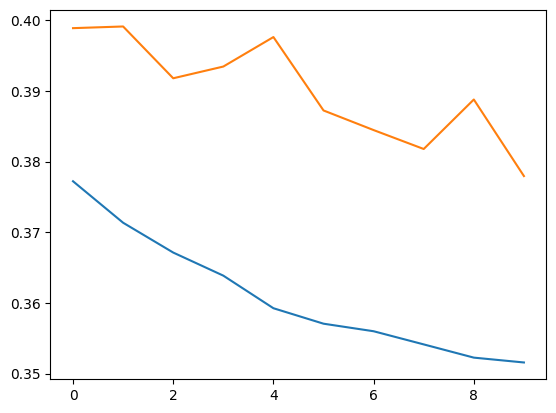

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

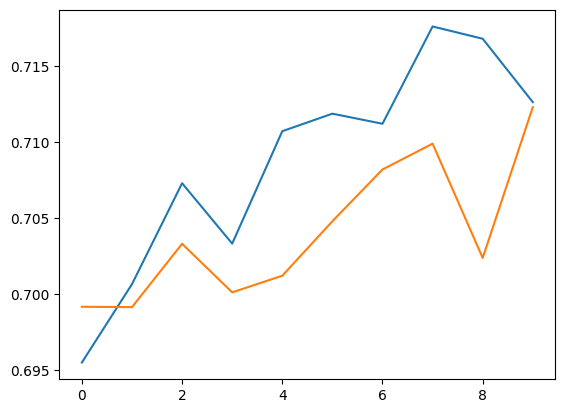

In [35]:
plt.plot(history.history["coff_determination"])
plt.plot(history.history["val_coff_determination"])

<Axes: >

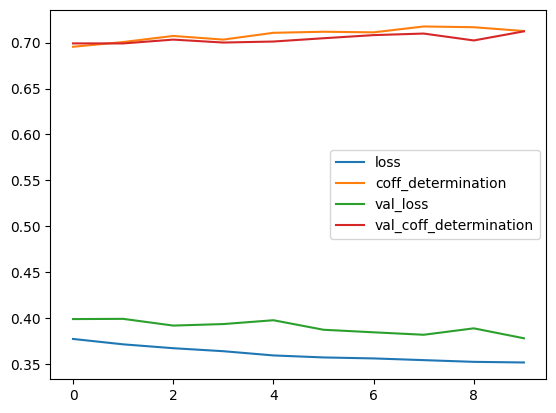

In [36]:
pd.DataFrame(history.history).plot()

In [59]:
new = X_test[2].reshape((1,8))

In [60]:
model.predict(new)

1/1 [==============================] - 0s 24ms/step


array([[4.033559]], dtype=float32)

In [58]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300
